# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Step 1: Create a Beautiful Soup Object

# First, I need to extract the HTML of the page that the browser has navigated to.
html = browser.html

# Next, I create a BeautifulSoup object to parse the HTML content.
# I'll use the 'html.parser' to process the page structure.
soup = BeautifulSoup(html, 'html.parser')



In [5]:
# Find and extract all rows from the table
table = soup.find('table')
rows = table.find_all('tr')

# Print extracted text from each row
for row in rows:
    cells = [cell.text.strip() for cell in row.find_all('td')]
    print(cells)


[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list to store rows
data = []



In [7]:
# Create a DataFrame using the list of rows and column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


# Loop through the rows of the table and extract the data, skipping rows with no data (e.g., headers)
for row in rows:
    cells = [cell.text.strip() for cell in row.find_all('td')]
    
    # Check if cells contain data (skip rows with empty cells or header rows)
    if cells and len(cells) == len(column_names):
        data.append(cells)
        
mars_df = pd.DataFrame(data, columns=column_names)



In [8]:
# Display the DataFrame to confirm it was created successfully
mars_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)


In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_months = mars_df['month'].nunique()
mars_months


12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_df['sol'].nunique()
martian_days

1867

In [14]:
# 3. What is the average minimum temperature by month?
average_min_temp = mars_df.groupby('month')['min_temp'].mean()
average_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

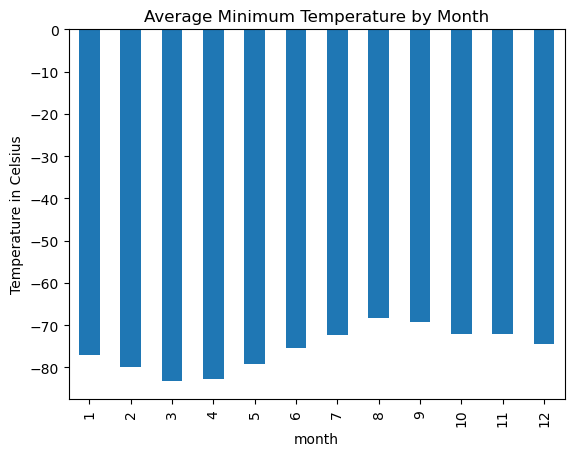

In [15]:
# Plot the average minimum temperature by month
average_min_temp.plot(kind='bar')

# Set the title and axis labels
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

# Show the plot
plt.show()


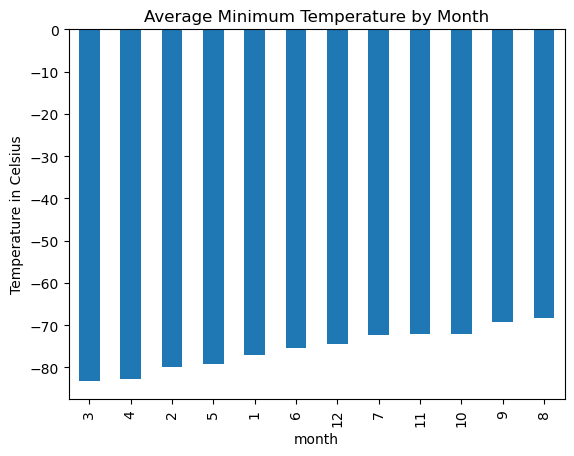

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the average minimum temperature by month
sorted_avg_min_temp = average_min_temp.sort_values()

# Plot the sorted temperatures
sorted_avg_min_temp.plot(kind='bar')

# Set the title and axis labels
plt.title("Average Minimum Temperature by Month")
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

# Show the plot
plt.show()


In [17]:
# 4. What is the average pressure by month?
average_pressure = mars_df.groupby('month')['pressure'].mean()
average_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

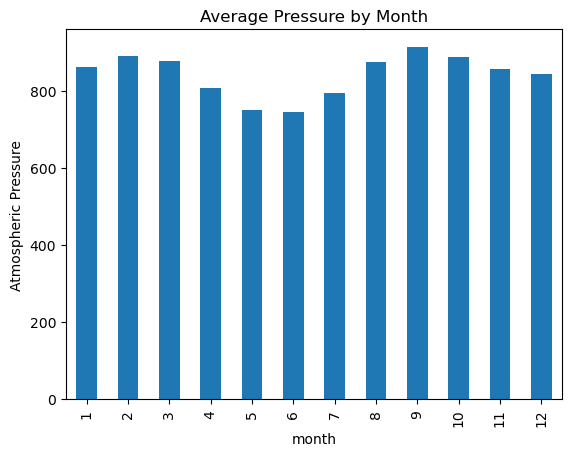

In [18]:
# Plot the average pressure by month
average_pressure.plot(kind='bar', title='Average Pressure by Month', xlabel='month', ylabel='Atmospheric Pressure')
# Show the plot
plt.show()

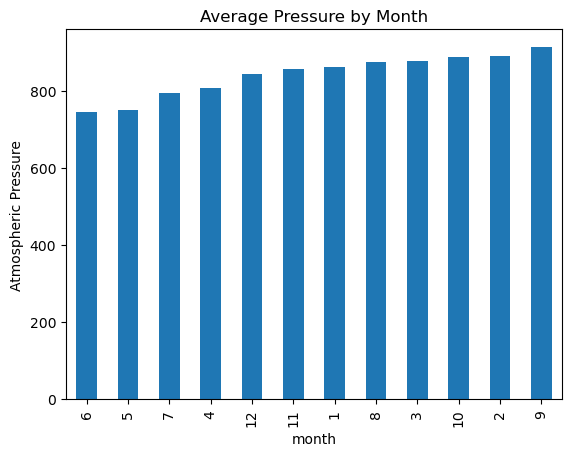

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_pressure = mars_df.groupby('month')['pressure'].mean().sort_values()

# Now, I plot the sorted data
sorted_pressure.plot(kind='bar', title='Average Pressure by Month', xlabel='month', ylabel='Atmospheric Pressure')

# Show the plot
plt.show()

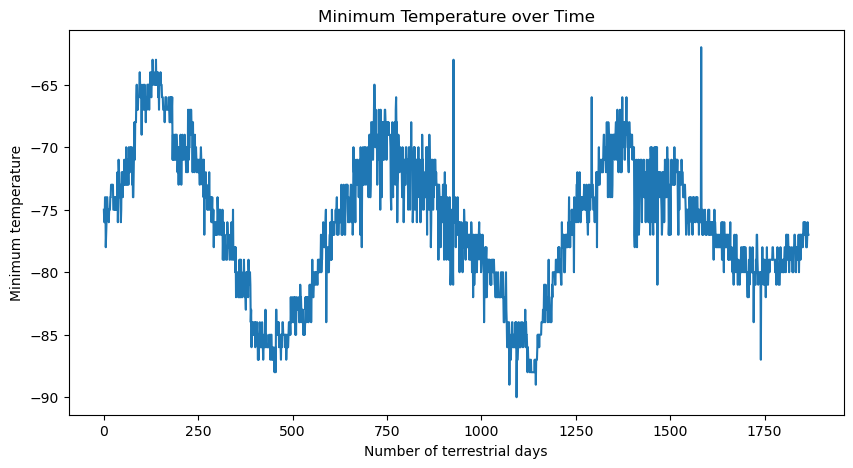

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# This plot will help visualize the cyclical pattern of Martian weather, giving us an idea of the length of a Martian year
plt.figure(figsize=(10,5))
plt.plot(mars_df.index, mars_df['min_temp'])
plt.title('Minimum Temperature over Time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.show()

#### Minimum Temperature

Looking at the minimum temperatures on Mars, we see some big swings throughout the Martian year. The coldest months, like months 3 and 4, hit average lows around -83°C, which highlights just how extreme Mars' environment is, especially during its colder seasons. Even the "warmer" months, like month 8, only see a slight rise in temperature, but it's still well below freezing. This tells us a lot about the thermal challenges any mission or potential colony would face on Mars.

#### Atmospheric Pressure

Atmospheric pressure on Mars also fluctuates throughout the year. The highest pressures happen around month 9, likely during the Martian winter, when CO2 freezes at the poles, causing atmospheric pressure to increase in other areas. The lowest pressures show up in months 5 and 6, which coincide with the warmer seasons when frozen CO2 sublimates back into the atmosphere. These shifts in pressure are super important for any missions involving landings or takeoffs because they directly impact the performance and stability of spacecraft.


#### Year Length

From our analysis of temperature and pressure changes, it looks like a Martian year lasts about 687 Earth days. This longer year, compared to Earth's, means Martian seasons are also longer, which is crucial to consider when planning long-term missions or even settlements. Plus, the slower climate shifts on Mars due to its extended year need to be factored in when planning mission duration and resource management.
This analysis gives us a solid understanding of Mars' environmental conditions and what needs to be considered for future missions or colonization plans.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV file
mars_df.to_csv('mars_weather_data.csv', index=False)


In [22]:
browser.quit()